In [111]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 
%matplotlib inline

In [112]:
def U(x):
    return x

In [113]:
a = -6
b = 6
n = 100


In [114]:
x = np.linspace(a,b, num = n)
step = x[1] - x[0]
x

array([-6.        , -5.87878788, -5.75757576, -5.63636364, -5.51515152,
       -5.39393939, -5.27272727, -5.15151515, -5.03030303, -4.90909091,
       -4.78787879, -4.66666667, -4.54545455, -4.42424242, -4.3030303 ,
       -4.18181818, -4.06060606, -3.93939394, -3.81818182, -3.6969697 ,
       -3.57575758, -3.45454545, -3.33333333, -3.21212121, -3.09090909,
       -2.96969697, -2.84848485, -2.72727273, -2.60606061, -2.48484848,
       -2.36363636, -2.24242424, -2.12121212, -2.        , -1.87878788,
       -1.75757576, -1.63636364, -1.51515152, -1.39393939, -1.27272727,
       -1.15151515, -1.03030303, -0.90909091, -0.78787879, -0.66666667,
       -0.54545455, -0.42424242, -0.3030303 , -0.18181818, -0.06060606,
        0.06060606,  0.18181818,  0.3030303 ,  0.42424242,  0.54545455,
        0.66666667,  0.78787879,  0.90909091,  1.03030303,  1.15151515,
        1.27272727,  1.39393939,  1.51515152,  1.63636364,  1.75757576,
        1.87878788,  2.        ,  2.12121212,  2.24242424,  2.36

In [115]:
def kinetic_energy(n):
    kinetic_energy_matrix = np.zeros((n-2)**2).reshape(n-2,n-2)

    for i in range(n-2):
        for j in range(n-2):
            if i == j:
                kinetic_energy_matrix[i][j] = -2
            elif np.abs(i-j) == 1:
                kinetic_energy_matrix[i][j] = 1
            else:
                kinetic_energy_matrix[i][j] = 0

    return kinetic_energy_matrix

kinetic_energy(n)


array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [116]:
def potential_energy(n):
    potential_energy_matrix = np.zeros((n-2)**2).reshape(n-2,n-2)

    for i in range(n-2):
        for j in range(n-2):
            if i == j:
                potential_energy_matrix[i][j] = U(x[i + 1])

            else:
                potential_energy_matrix[i][j] = 0

    return potential_energy_matrix

potential_energy(n)


array([[-5.87878788,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -5.75757576,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -5.63636364, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  5.63636364,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         5.75757576,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  5.87878788]])

In [117]:
hamiltonian = kinetic_energy(n)/(2*step**2) + potential_energy(n)
hamiltonian

array([[-73.94128788,  34.03125   ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 34.03125   , -73.82007576,  34.03125   , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  34.03125   , -73.69886364, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., -62.42613636,
         34.03125   ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,  34.03125   ,
        -62.30492424,  34.03125   ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         34.03125   , -62.18371212]])

In [118]:
E_value, E_func = np.linalg.eig(hamiltonian)
# print(E_value)
# print(E_func)

In [119]:
Eigen_value = np.argsort(E_value, axis = 0)
Eigen_value = Eigen_value[0:2]
E_func = E_func.T
Eigen_value

array([0, 1], dtype=int64)

Making the energies dimensionless


In [120]:
energies = (E_value[Eigen_value]/E_value[Eigen_value][0])
print(energies)

[1.         0.99012365]


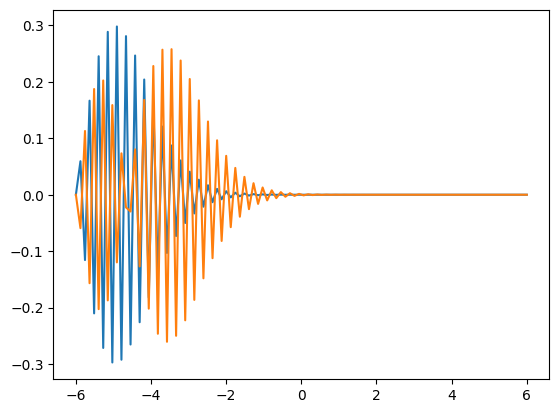

In [121]:
# plt.figure(figsize=(12,10))
for i in range(len(Eigen_value)):
    y = np.concatenate(([0], E_func[i], [0]))
    plt.plot(x,y)
    # y = []
    # y = np.append(y,E_func[:,Eigen_value[i]])
    # y = np.append(y,0)
    # y = np.insert(y,0,0)


plt.show()

